# Message plot

**Goal:** Remake the plot from Michael's [Moriond 2018 talk](https://indico.in2p3.fr/event/16579/contributions/60820/attachments/47219/59316/Kagan_hh_MoriondEW2018.pdf) but put our EB request limit in!!

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pyhf
import os

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

os.sys.path.append('../../hh4b/hh4b-plots/')
from hh4b_plots.colors import *

In [2]:
cols = ['lumi','paper','mu']

df = pd.DataFrame(0,index=range(4),columns=cols)

# 3.2 ifb
df.loc[0,'paper'] = 'Phys. Rev. D 94 (2016) 052002 3.2 fb$^{-1}$'
df.loc[0,'lumi'] = 3.2
df.loc[0,'mu'] = 110

# 13.3 ifb
df.loc[1,'paper'] = 'ATLAS-CONF-2016-049 13.3 fb$^{-1}$'
df.loc[1,'lumi'] = 13.3
df.loc[1,'mu'] = 40


# 27.5 ifb
df.loc[2,'paper'] = 'JHEP 01 (2019) 030 27.5 fb$^{-1}$'
df.loc[2,'lumi'] = 27.5
df.loc[2,'mu'] = 20

# 126.0 ifb
df.loc[3,'paper'] = 'Us! (bkg only syst), 126.0 fb$^{-1}$'
df.loc[3,'lumi'] = 126
df.loc[3,'mu'] = 6

**Q:** Is there a reason why MK was citing the exp instead of the obs limit for 36 ifb?

In [3]:
df

lumi                                        paper   mu
0    3.2  Phys. Rev. D 94 (2016) 052002 3.2 fb$^{-1}$  110
1   13.3           ATLAS-CONF-2016-049 13.3 fb$^{-1}$   40
2   27.5            JHEP 01 (2019) 030 27.5 fb$^{-1}$   20
3  126.0         Us! (bkg only syst), 126.0 fb$^{-1}$    6

(-10.0, 120.0)

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


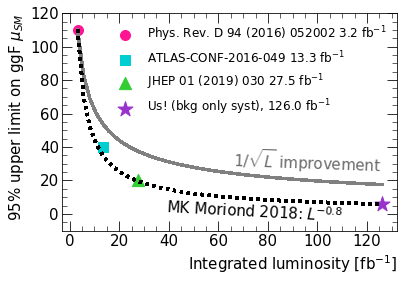

In [4]:
markers = ['o','s','^','*']
colors = ['deeppink','darkturquoise','limegreen','darkorchid']
sizes = [100,100,150,250]
for i, (m, c, s) in enumerate(zip(markers,colors,sizes)):
    plt.scatter(df.loc[i,'lumi'],df.loc[i,'mu'], s, color=c, marker=m,label=df.loc[i,'paper'])
    
plt.xlabel('Integrated luminosity [fb$^{-1}$]',loc='right')
plt.ylabel('95% upper limit on ggF $\mu_{SM}$',loc='top')
plt.legend(loc='upper right',fontsize=12)

xx = np.linspace(df.loc[0,'lumi'],df.loc[3,'lumi'])
plt.plot(xx, df.loc[0,'mu']*np.sqrt(df.loc[0,'lumi']/ xx), color='grey')
plt.plot(xx, df.loc[0,'mu']*np.power(xx/df.loc[0,'lumi'],-0.8), color='k',ls='dotted')

plt.text(126,25,r'$1 / \sqrt{\mathcal{L}}$ improvement',color='dimgrey',ha='right',rotation=358)
plt.text(110,10,'MK Moriond 2018: $\mathcal{L}^{-0.8}$',color='k',ha='right',va='top',rotation=357)

plt.ylim(-10,120)

**Goal:** Revise this plot for my thesis.

In [31]:
x = np.concatenate([df['lumi'].values[:-1],[126]])
y = np.concatenate([s*df['mu'].values[:-1],[7.36]])

In [32]:
x,y

(array([  3.2,  13.3,  27.5, 126. ]),
 array([118.63334368,  43.1393977 ,  21.56969885,   7.36      ]))

In [36]:
from scipy import optimize

In [37]:
def func(x, m, b):
    y = m*x + b
    return y

alpha, kappa = optimize.curve_fit(func, xdata =np.log(x), ydata = np.log(y))[0]
print(alpha)

[-0.76423182  5.67580978]


In [48]:
np.exp(np.power(300,-0.76423182) * 5.67580978)

1.075299670410884

(-10.0, 140.0)

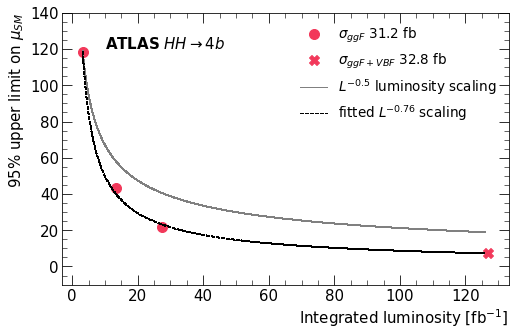

In [44]:
plt.figure(figsize=(8,5))

markers = ['o','o','o','^']
lw=1

s = 11.3 / (31.05 * 0.5809**2)

plt.scatter(df['lumi'].values[:-1],s*df['mu'].values[:-1], 100, 
            color='hh:darkpink', marker='o',label='$\sigma_{ggF}$ 31.2 fb')

plt.scatter([127],[7.36], 100, 
            color='hh:darkpink', marker='X',label='$\sigma_{ggF+VBF}$ 32.8 fb')
    
xx = np.linspace(df.loc[0,'lumi'],df.loc[3,'lumi'],200)
plt.plot(xx, s*df.loc[0,'mu']*np.sqrt(df.loc[0,'lumi']/ xx), color='grey',lw=lw,
         label='$L^{-0.5}$ luminosity scaling')
plt.plot(xx, s*df.loc[0,'mu']*np.power(xx/df.loc[0,'lumi'],-0.76), color='k',ls='--',lw=lw,
         label='fitted $\mathcal{L}^{-0.76}$ scaling')


plt.xlabel('Integrated luminosity [fb$^{-1}$]',loc='right')
plt.ylabel('95% upper limit on $\mu_{SM}$',loc='top')
plt.legend(loc='upper right',fontsize=13.5)


plt.text(10,120,r'${\bf ATLAS}$ $HH \rightarrow 4b$',color='k',ha='left')

plt.ylim(-10,140)

plt.savefig('figures/HH4b_results.pdf')

In [6]:
31.05*(0.58**2)

10.445219999999999